In [ ]:
# mount drive to access data
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
# change path HERE to reflect your folder structure
my_path = '/content/drive/MyDrive/suicide-project/data/'

In [ ]:
!head -2 /content/drive/MyDrive/suicide-project/data/sentiment.csv

post_id,date,lemmatized_body,compound,sentiment
1742806,"Oct 6, 2022",one nice thing,0.4215,positive


In [ ]:
# create dataframe from csv data file

import pandas as pd
from ast import literal_eval
df = pd.read_csv(my_path + 'sentiment.csv', usecols = ['post_id','date','sentiment','lemmatized_body'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1337982 entries, 0 to 1337981
Data columns (total 4 columns):
 #   Column           Non-Null Count    Dtype 
---  ------           --------------    ----- 
 0   post_id          1337982 non-null  int64 
 1   date             1337982 non-null  object
 2   lemmatized_body  1314538 non-null  object
 3   sentiment        1337982 non-null  object
dtypes: int64(1), object(3)
memory usage: 40.8+ MB


In [ ]:
df2 = df.groupby(['sentiment'])['sentiment'].count()
(100. * df2 / df2.sum()).round(2)

sentiment
negative    37.89
neutral     14.34
positive    47.77
Name: sentiment, dtype: float64

In [ ]:
# load groupwise post ids for fine-grained sentiment visualization
with open(my_path+'groupwise_postids.csv','r') as f_:
  f = f_.readlines()

postids = []
for line in f:
  line = line.rstrip()
  line = line.split(',')
  print(line[0],len(line[1:]))
  line = [int(l) for l in line[1:]]
  postids.append(line)

sn 3657
hanging 1375
firearm 1134
benzodiazepines 774
opioids 546
antiemetic 520
barbiturates 472
acid_regulator 333
cyanides 114
other_preservatives 98
plantbased_poisons 55
household_chemicals 45
ricin 13
nitric_oxide 22


In [ ]:
# sn
df3 = df.loc[df['post_id'].isin(postids[0][1:])]
df3 = df3.groupby(['sentiment'])['sentiment'].count()
(100. * df3 / df3.sum()).round(2)

sentiment
negative    40.34
neutral      8.10
positive    51.56
Name: sentiment, dtype: float64

In [ ]:
# hanging
df3 = df.loc[df['post_id'].isin(postids[1][1:])]
df3 = df3.groupby(['sentiment'])['sentiment'].count()
(100. * df3 / df3.sum()).round(2)

sentiment
negative    56.91
neutral      0.73
positive    42.36
Name: sentiment, dtype: float64

In [ ]:
# obtain post ids of all filtered posts

filtered = []
for method in postids:
  for id in method:
    filtered.append(id)

len(filtered)

9158

In [ ]:
# filtered

df3 = df.loc[df['post_id'].isin(filtered)]
df3 = df3.groupby(['sentiment'])['sentiment'].count()
(100. * df3 / df3.sum()).round(2)

sentiment
negative    46.83
neutral      5.09
positive    48.08
Name: sentiment, dtype: float64

(-0.5, 399.5, 399.5, -0.5)

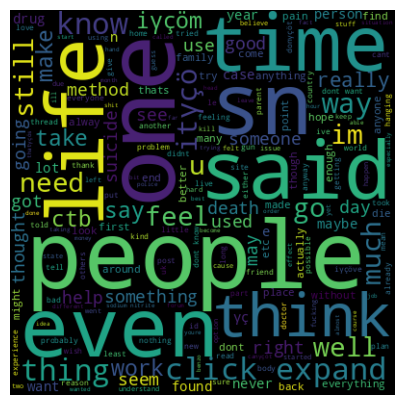

In [ ]:
# word cloud
df3 = df.loc[df['post_id'].isin(filtered)]
all_words_lem = ' '.join([str(word) for word in df3['lemmatized_body']])

%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wordcloud = WordCloud(width=400,
                     height=400,
                     random_state=2,
                     max_font_size=100).generate(all_words_lem)

plt.figure(figsize=(5,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

In [ ]:
# month & year-based change in sentiments for filtered posts

df3 = df.loc[df['post_id'].isin(filtered)]
# find month + year associated with each post
df3['date_n'] = pd.to_datetime(df3['date'])    # converting string type to datetime object
list_year = [i.split(" ")[0][0:4] for i in list(df3['date_n'].astype(str))]
list_month = [i.split(" ")[0][5:7] for i in list(df3['date_n'].astype(str))]
df3['year'] = list_year
df3['month'] = list_month
df3.drop(['date_n'], axis=1)
del df3['date_n']
df3.drop(['date','lemmatized_body'], axis = 1, inplace = True)
df3.to_csv(my_path+'sentiment_filtered_month_year.csv', sep=',', header=True, index=False)

,post_id,date,lemmatized_body,sentiment
8678,1402143,"Nov 27, 2021",dissapointed relapsed jiminyjeesus withdrawal ...,positive
12575,1364467,"Oct 21, 2021",sadness woke minute ago0730 want sleep lil bit...,positive
13811,1724621,"Sep 18, 2022",im falling im tired ive long seem stick head h...,positive
14138,1718545,"Sep 12, 2022",12 guagedunkie butt gim dunkie butt big ol leg...,positive
14356,317564,"May 28, 2019",você realmente pesquisou sobre sn pelo que li ...,neutral
...,...,...,...,...
1337120,1159960,"Mar 12, 2021",anyone know best type firearmammo ctb never th...,positive
1337805,1101626,"Jan 22, 2021",borrowing great deal trouble business exist ma...,negative
1337832,1100203,"Jan 22, 2021",suffering mental illness unless suicidal ideat...,negative
1337897,1098150,"Jan 20, 2021",feminine without trans feminine male still app...,positive


In [ ]:
# month & year-based change in sentiments for sn posts

df3 = df.loc[df['post_id'].isin(postids[0][1:])]
# find month + year associated with each post
df3['date_n'] = pd.to_datetime(df3['date'])    # converting string type to datetime object
list_year = [i.split(" ")[0][0:4] for i in list(df3['date_n'].astype(str))]
list_month = [i.split(" ")[0][5:7] for i in list(df3['date_n'].astype(str))]
df3['year'] = list_year
df3['month'] = list_month
df3.drop(['date_n'], axis=1)
del df3['date_n']
df3.drop(['date','lemmatized_body'], axis = 1, inplace = True)
df3.to_csv(my_path+'sentiment_sn_month_year.csv', sep=',', header=True, index=False)

<ipython-input-26-f0639850a81d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['date_n'] = pd.to_datetime(df3['date'])    # converting string type to datetime object
<ipython-input-26-f0639850a81d>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['year'] = list_year
<ipython-input-26-f0639850a81d>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://panda